## NLP_HW_20

In [2]:
import re
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

## 3.Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 

In [2]:
# gutenberg corpus
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [88]:
# loading Paradise Lost sentences 
paradise_sent = nltk.corpus.gutenberg.sents('milton-paradise.txt')

In [89]:
# loading paradise lost words
paradise_words = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise_words

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

#### Stop words

In [42]:
# stop words. NOTE: all stop words are in lower case
#import nltk
#nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

* After we print few sentences, we can do some text preprocessing. Lets remove stop words from paradise first few  sentences  and then we can use lemmetizer.

#### Converting into lower case

In [90]:
# using list comprehension(LC) to lower the words from lost paadise words
lower_case = [i.lower() for i in paradise_words ]

#### Removing stop words
NOTE: from sentences we cant remove stop words, either we have to convert it into words(list) or we can use word tokenize 

In [91]:
rem_stopword = [j for j in lower_case if j not in stop_words]

#### Using lemmatizer 

In [51]:
#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [92]:
from nltk.stem import WordNetLemmatizer

# creating an object for lemmatizer
lemma = WordNetLemmatizer()

# using list comprehension applying lemmatizer to the stop words removed sentence
lemma_sent = [lemma.lemmatize(i) for i in rem_stopword]

# counting bag of words using counter
from collections import Counter
bag_words = Counter(lemma_sent)

# printing 20 words which are the most commom
print(bag_words.most_common(20))

[(',', 10198), (';', 2317), ('.', 1254), (':', 748), ("'", 595), ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('-', 334), ('thus', 318), ('god', 316), ('?', 301), ('shall', 283), ('!', 251), ('yet', 228), ('earth', 217), ('though', 217), ('u', 187), ('man', 176)]


#### Using Stemmer

In [93]:
from nltk.stem.snowball import SnowballStemmer

# Instatntiating stemmer
stemmer = SnowballStemmer(language = 'english')

# using stemmer in lost paradise
stemmed_paradise = [stemmer.stem(i) for i in rem_stopword]
stemmed_paradise

# already imported counter
bag_stem = Counter(stemmed_paradise)
print(bag_stem.most_common(20))

[(',', 10198), (';', 2317), ('.', 1254), (':', 748), ("'", 595), ('heaven', 485), ('thou', 432), ('thi', 414), ('thee', 358), ('-', 334), ('thus', 318), ('god', 316), ('?', 301), ('shall', 283), ('!', 251), ('earth', 228), ('yet', 228), ('though', 217), ('us', 187), ('man', 178)]


#### Specify why you chose stemming or lemmatization?

* From both of my lemmatizer and stemmer results, I decided to use lemmetizer. Because in stemmer some words aren't stemmed meaningfully. For instance, **('forc', 7)** force stemmed forc,**('chang', 6)** change as chang. But lemmatizer gave full meaning full words. **Hence I chose lemmatizer**.

* my most common words contains punctuations and some meaningless words like st, th. I am enhancing my preprocseeing by  removing punctuations and again see the performance.

In [94]:
# In python we have a builtin function is_alnum() used to print only alphatetical letters and numbers if its have.
# To remove punctuations I am using that function in LC

alpha_only = [i for i in lemma_sent if i.isalnum()]

In [97]:
# bag of words contain some meaning less words like th, u. I am removing those.
meaningless = ['th','u','thus','though','thou','yet','thee','thy']

# removing these words from our alphanumeric only list
final_words = [i for i in alpha_only if i not in meaningless]


#### Now punctuations are removed, checking bag counts using lemmatizer

In [98]:
lemma_sent = [lemma.lemmatize(i) for i in final_words]
lemma_sent = [i.capitalize() for i in lemma_sent]

# counting bag of words using counter
bag_words = Counter(lemma_sent)

# printing 20 words which are the most commom
print(bag_words.most_common(20))

[('Heaven', 436), ('God', 316), ('Shall', 283), ('Earth', 217), ('Man', 176), ('First', 175), ('Day', 157), ('High', 153), ('One', 142), ('Son', 132), ('Far', 129), ('Death', 127), ('May', 126), ('Power', 125), ('Great', 123), ('Till', 120), ('Like', 120), ('World', 119), ('Hell', 119), ('Thing', 116)]


#### Unpacking tuples

In [104]:
# my bag of words is a list of tuples. I need words and word count separately to plot histogram. Unzipping tuple will 
# give those separate values. I can convert this into dataframe and plot histogram or I can unpack the tuples.

bow_20 = bag_words.most_common(20)
words, count = zip(*bow_20)
print(words)
print(count)

('Heaven', 'God', 'Shall', 'Earth', 'Man', 'First', 'Day', 'High', 'One', 'Son', 'Far', 'Death', 'May', 'Power', 'Great', 'Till', 'Like', 'World', 'Hell', 'Thing')
(436, 316, 283, 217, 176, 175, 157, 153, 142, 132, 129, 127, 126, 125, 123, 120, 120, 119, 119, 116)


#### Plotting bag of words

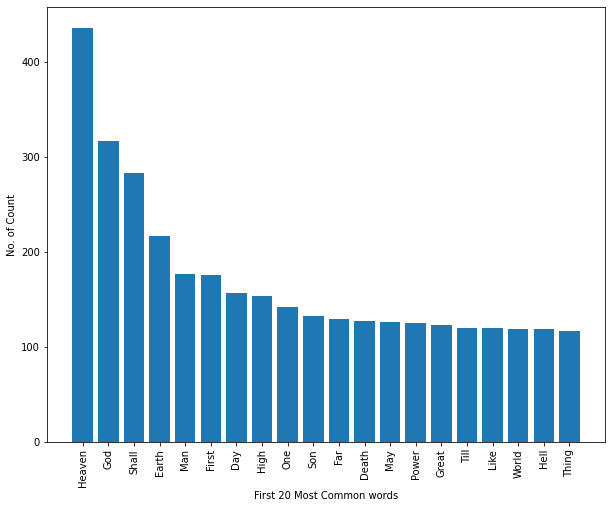

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(words,count)
plt.xlabel("First 20 Most Common words")
plt.ylabel("No. of Count")
plt.xticks(rotation = 90)
plt.show();

## 4.Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.


### Sentiment Analysis

* Sentiment analysis is a text analysis method that detects polarity(i.e., positve or negatice opinion) within the text or paragraph or sentence.

* VADAR(Valence Aware Dictionary for sEntiment Reasoning) is a text analysis method that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

In [3]:
# lets print few sentences from paradise lost
paradise_sentence_10 = nltk.corpus.gutenberg.sents('milton-paradise.txt')[:10]
#paradise_sentence_10

In [4]:
# downloading entire book
paradise_sentence = nltk.corpus.gutenberg.sents('milton-paradise.txt')

#### Removing punctuations and spaces from the sentences

In [15]:
def plain_sentence(sentenc):
    sent = ' '.join(sentenc).replace(' , ',',').replace(' .','.').replace(' ? ','?').replace(' : ',':')\
    .replace('  ','').replace(' )',')').replace(' !','!').replace(' ?','?').replace('\'','').replace(' ,',',')\
    .replace(' .','.').replace(' ; ',';').replace(' ;',';').replace(' -- ','--').replace(' :',':').replace(' " ','"')
    return sent
    

plain_sent = ""
for i in range(0,len(paradise_sentence_10)):
    plain_sent = plain_sent + plain_sentence(paradise_sentence_10[i])

print(plain_sent)

[ Paradise Lost by John Milton 1667 ]Book IOf Man  s first disobedience,and the fruit Of that forbidden tree whose mortal taste Brought death into the World,and all our woe,With loss of Eden,till one greater Man Restore us,and regain the blissful seat,Sing,Heavenly Muse,that,on the secret top Of Oreb,or of Sinai,didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos:or,if Sion hill Delight thee more,and Siloa  s brook that flowed Fast by the oracle of God,I thence Invoke thy aid to my adventurous song,That with no middle flight intends to soar Above th  Aonian mount,while it pursues Things unattempted yet in prose or rhyme.And chiefly thou,O Spirit,that dost prefer Before all temples th  upright heart and pure,Instruct me,for thou know  st;thou from the first Wast present,and,with mighty wings outspread,Dove - like sat  st brooding on the vast Abyss,And mad  st it pregnant:what in me is dark Illumine,what is low raise a

#### Calling the function for entire book

In [16]:
plain_sent = ""
for i in range(0,len(paradise_sentence)):
    plain_sent = plain_sent + plain_sentence(paradise_sentence[i])
    
#print(plain_sent)

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Codergirl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Sentiment Analysis for entire book

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# creating an object for sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# finding polarity
sentiment = sentiment_analyzer.polarity_scores(plain_sent)

print(sentiment_list)
print("Paradise Lost book was rated as ",sentiment['neg']*100, "% Negative")
print("Paradise Lost book was rated as ",sentiment['pos']*100, "% Positive")
print("Paradise Lost book was rated as ",sentiment['neu']*100, "% Neutral")

[{'neg': 0.1, 'neu': 0.746, 'pos': 0.154, 'compound': 1.0}]
Paradise Lost book was rated as  10.0 % Negative
Paradise Lost book was rated as  15.4 % Positive
Paradise Lost book was rated as  74.6 % Neutral


* Since I have to print most positive, negative and neutral lines, I am finding polarity to every lines in the book

In [36]:
plain_sentlist =[]
for i in range(0,len(paradise_sentence)):
    plain_sentlist.append(plain_sentence(paradise_sentence[i]))
    
sentiment_list = []
for i in range(0,len(plain_sentlist)):
    sentiment = sentiment_analyzer.polarity_scores(plain_sentlist[i]) 
    sentiment_list.append({"Positive":sentiment['pos'],
            "Negative":sentiment['neg'],
            "Neutral":sentiment['neu']})  


* I am converting sentiment analysis of entire lines into dataframe. So that I can print the top 5 list from descending order. 

In [43]:
import pandas as pd

sentiment_df = pd.DataFrame(sentiment_list)
sentiment_df

,Positive,Negative,Neutral
0,0.400,0.219,0.381
1,0.000,0.000,1.000
2,0.181,0.088,0.731
3,0.141,0.071,0.788
4,0.256,0.033,0.712
...,...,...,...
1846,0.323,0.097,0.581
1847,0.091,0.000,0.909
1848,0.091,0.033,0.876
1849,0.096,0.112,0.792


* Appended sentences into the dataframe to print the most 5 positive, negative, neutral lines from the book

In [49]:
sentiment_df['sentences'] = plain_sentlist
sentiment_df

,Positive,Negative,Neutral,sentences
0,0.400,0.219,0.381,[ Paradise Lost by John Milton 1667 ]
1,0.000,0.000,1.000,Book I
2,0.181,0.088,0.731,"Of Man s first disobedience,and the fruit Of ..."
3,0.141,0.071,0.788,"And chiefly thou,O Spirit,that dost prefer Bef..."
4,0.256,0.033,0.712,Say first--for Heaven hides nothing from thy v...
...,...,...,...,...
1846,0.323,0.097,0.581,This further consolation yet secure I carry he...
1847,0.091,0.000,0.909,So spake our mother Eve;and Adam heard Well pl...
1848,0.091,0.033,0.876,"High in front advanced,The brandished sword of..."
1849,0.096,0.112,0.792,"They,looking back,all the eastern side beheld ..."


#### Most 5 Positive sentences

In [54]:
positve_df = sentiment_df[['Positive','sentences']]
most_5_pos = positve_df.sort_values(ascending = False, by ='Positive')
most_5_pos.head()

,Positive,sentences
828,1.000,O Heaven!
1441,1.000,O Heaven!
605,1.000,O friends!
908,1.000,O Friends!
626,0.787,Courageous Chief!


#### Most 5 Negative sentences

In [55]:
negative_df = sentiment_df[['Negative','sentences']]
most_5_neg =negative_df.sort_values(ascending = False, by ='Negative').head()
most_5_neg

,Negative,sentences
512,1.000,O Hell!
153,1.000,No!
1689,1.000,Alas!
478,0.777,Me miserable!
314,0.773,"I fled,and cried out Death!"


#### Most 5 Neutral sentences

In [56]:
Neutral_df = sentiment_df[['Neutral','sentences']]
most_5_neu = Neutral_df.sort_values(ascending = False, by ='Neutral').head()
most_5_neu

,Neutral,sentences
1850,1.0,[ The End ]
673,1.0,Oft in her absence mimick Fancy wakes To imita...
1274,1.0,To whom the Tempter guilefully replied.
665,1.0,"Here,happy creature,fair angelick Eve!"
284,1.0,"The one seemed woman to the waist,and fair,But..."


In [57]:
sentiment_df['sentences'][284]

'The one seemed woman to the waist,and fair,But ended foul in many a scaly fold,Voluminous and vast--a serpent armed With mortal sting.'

In [60]:
sentiment_df['sentences'][673]

'Oft in her absence mimick Fancy wakes To imitate her;but,misjoining shapes,Wild work produces oft,and most in dreams;Ill matching words and deeds long past or late.'

## 5. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

* All my top 5 positive sentences looks delightful. It is expressing happiness. So I agree with my positive findings.

* If you see my top 5 negative sentences(**OHell, No!!, Alas!! , miserable, cried**) are expressing sadness. So sentiment analysis with negative commands are also acceptable.

* All 4 sentences other that **"Here,happy creature,fair angelick Eve!"** sentences from neutral seems to be without any expressions. But I doubt this one. My analysis shows its 100% neutral. My thoughts about is Happy creature, eves might come under positive sentiment. 

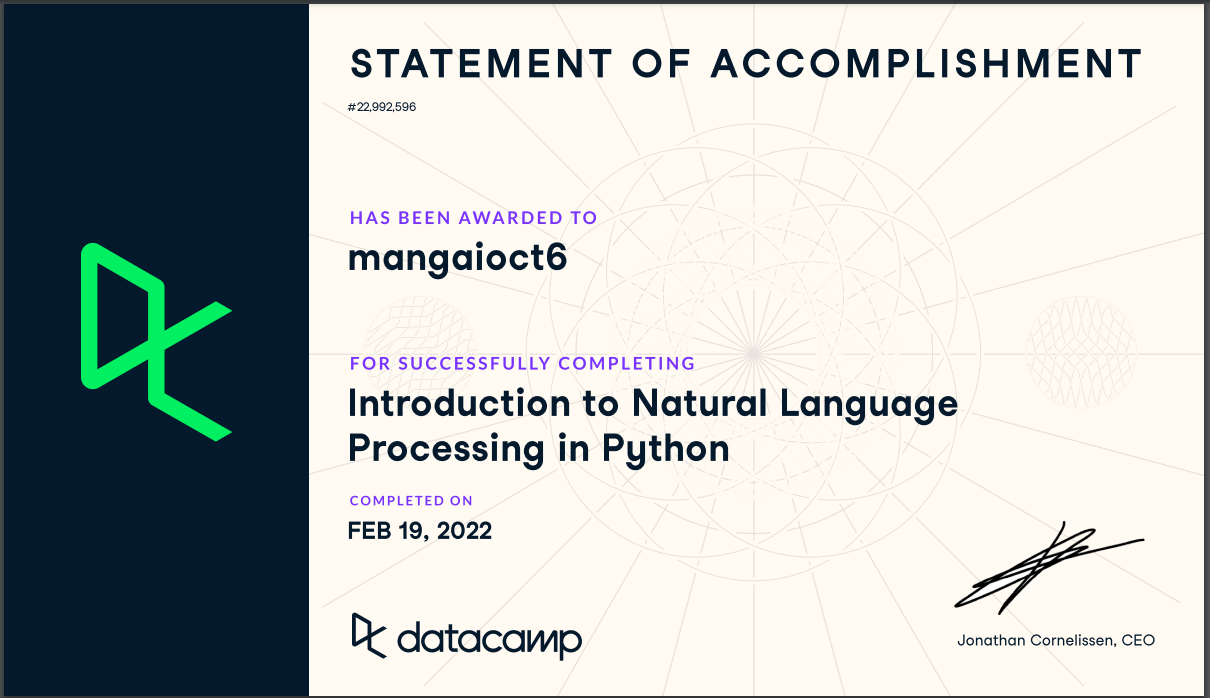